In [98]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import time
from datetime import timedelta

In [99]:
df = pd.read_json('data/yelp_academic_dataset_business.json', lines=True)

In [100]:
print("df.shape", df.shape)
df.head()

df.shape (150346, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [101]:
# drop all records with NA values and drop irrelevant columns
df = df.dropna()
df = df.drop(columns=['name', 'address', 'city'])
print("df.shape", df.shape)

df.shape (117618, 11)


In [102]:
# only keep currently open businesses
df = df[df['is_open']==1]
# remove is_open column since it only contains 1s now
df = df.drop(columns='is_open')
print("df.shape", df.shape)
df.head()

df.shape (94976, 10)


,business_id,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours
1,mpf3x-BjTdTEA3yCZrAYPw,MO,63123,38.551126,-90.335695,3.0,15,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
3,MTSW4McQd7CbVtyjqoe9mw,PA,19107,39.955505,-75.155564,4.0,80,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,PA,18054,40.338183,-75.471659,4.5,13,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,CF33F8-E6oudUQ46HnavjQ,TN,37015,36.269593,-87.058943,2.0,6,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
6,n_0UpQx1hsNbnPUSlodU8w,MO,63144,38.627695,-90.340465,2.5,13,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."


In [103]:
# only keep businesses that are categorizes as 'Restaurants'
df = df[df['categories'].str.contains('Restaurants')]
print("df.shape", df.shape)
df.head()

df.shape (31357, 10)


,business_id,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,PA,19107,39.955505,-75.155564,4.0,80,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
5,CF33F8-E6oudUQ46HnavjQ,TN,37015,36.269593,-87.058943,2.0,6,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
9,bBDDEgkFA1Otx9Lfe7BZUQ,TN,37207,36.208102,-86.768170,1.5,10,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
11,eEOYSgkmpB90uNA7lDOMRA,FL,33602,27.955269,-82.456320,4.0,10,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."
12,il_Ro8jwPlHresjw9EGmBg,IN,46227,39.637133,-86.127217,2.5,28,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ..."


In [104]:
df = df.join(pd.json_normalize(df['attributes']))
df = df.join(pd.json_normalize(df['hours']))
df = df.drop(columns=['attributes', 'hours'])

In [105]:
def parse_hours(day_hours_str):
    if pd.isna(day_hours_str):
        return 0
    
    time_endpoints = str(day_hours_str).split('-')

    if time_endpoints[0] == time_endpoints[1]:
        # 0:0-0:0
        return 0
    
    start_time = time.strptime(time_endpoints[0], "%H:%M")
    end_time = time.strptime(time_endpoints[1], "%H:%M")

    # account for edge cases in data where we have 10-1, which is technically 10am-1am
    et_hour = (24 + end_time.tm_hour) if end_time.tm_hour < start_time.tm_hour else end_time.tm_hour
    
    start_time_td = timedelta(hours=start_time.tm_hour, minutes=start_time.tm_min)
    end_time_td = timedelta(hours=et_hour, minutes=end_time.tm_min)

    duration = end_time_td - start_time_td

    return duration.total_seconds() / 3600

total_hours_arr = []
count_neg = 0

for ind in df.index:
    total_hours = 0
    
    # print(df['name'][ind])
    # print(df['address'][ind])
    
    monday_hours_str = df['Monday'][ind]
    # print("monday hours string", monday_hours_str)
    monday_hours = parse_hours(monday_hours_str)
    # print("monday hours parsed", monday_hours)
    total_hours += monday_hours

    tuesday_hours_str = df['Tuesday'][ind]
    # print("tuesday hours string", tuesday_hours_str)
    tuesday_hours = parse_hours(tuesday_hours_str)
    # print("tuesday hours parsed", tuesday_hours)
    total_hours += tuesday_hours

    wednesday_hours_str = df['Wednesday'][ind]
    # print("wednesday hours string", wednesday_hours_str)
    wednesday_hours = parse_hours(wednesday_hours_str)
    # print("wednesday hours parsed", wednesday_hours)
    total_hours += wednesday_hours

    thursday_hours_str = df['Thursday'][ind]
    # print("thursday hours string", thursday_hours_str)
    thursday_hours = parse_hours(thursday_hours_str)
    # print("thursday hours parsed", thursday_hours)
    total_hours += thursday_hours

    friday_hours_str = df['Friday'][ind]
    # print("friday hours string", friday_hours_str)
    friday_hours = parse_hours(friday_hours_str)
    # print("friday hours parsed", friday_hours)
    total_hours += friday_hours

    saturday_hours_str = df['Saturday'][ind]
    # print("saturday hours string", saturday_hours_str)
    saturday_hours = parse_hours(saturday_hours_str)
    # print("saturday hours parsed", saturday_hours)
    total_hours += saturday_hours

    sunday_hours_str = df['Sunday'][ind]
    # print("sunday hours string", sunday_hours_str)
    sunday_hours = parse_hours(sunday_hours_str)
    # print("sunday hours parsed", sunday_hours)
    total_hours += sunday_hours

    total_hours_arr.append(total_hours)

df['total_open_hours'] = total_hours_arr
df = df.drop(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df.head()

,business_id,state,postal_code,latitude,longitude,stars,review_count,categories,RestaurantsDelivery,OutdoorSeating,...,BYOB,Corkage,BYOBCorkage,RestaurantsCounterService,Open24Hours,AgesAllowed,AcceptsInsurance,DietaryRestrictions,HairSpecializesIn,total_open_hours
3,MTSW4McQd7CbVtyjqoe9mw,PA,19107,39.955505,-75.155564,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
5,CF33F8-E6oudUQ46HnavjQ,TN,37015,36.269593,-87.058943,2.0,6,"Burgers, Fast Food, Sandwiches, Food, Ice Crea...",True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0
9,bBDDEgkFA1Otx9Lfe7BZUQ,TN,37207,36.208102,-86.768170,1.5,10,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
11,eEOYSgkmpB90uNA7lDOMRA,FL,33602,27.955269,-82.456320,4.0,10,"Vietnamese, Food, Restaurants, Food Trucks",True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0
12,il_Ro8jwPlHresjw9EGmBg,IN,46227,39.637133,-86.127217,2.5,28,"American (Traditional), Restaurants, Diners, B...",False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0


In [106]:
df = df.filter(['total_open_hours', 'RestaurantsTakeOut', 'RestaurantsDelivery', 'Alcohol', 'latitude', 'longitude', 'stars'])

In [107]:
df.head()

,total_open_hours,RestaurantsTakeOut,RestaurantsDelivery,Alcohol,latitude,longitude,stars
3,23.0,NaN,NaN,'none',39.955505,-75.155564,4.0
5,53.0,True,True,'full_bar',36.269593,-87.058943,2.0
9,100.0,NaN,NaN,NaN,36.208102,-86.768170,1.5
11,36.0,True,True,NaN,27.955269,-82.456320,4.0
12,34.0,True,False,u'full_bar',39.637133,-86.127217,2.5


In [108]:
df['RestaurantsTakeOut'] = df['RestaurantsTakeOut'].fillna('False')
df['RestaurantsDelivery'] = df['RestaurantsDelivery'].fillna('False')
df['Alcohol'] = df['Alcohol'].fillna('False')

In [109]:
df['Alcohol'].value_counts()

Alcohol
False               26276
u'none'              2017
u'full_bar'          1418
'none'                626
u'beer_and_wine'      573
'full_bar'            298
'beer_and_wine'       142
None                    7
Name: count, dtype: int64

In [110]:
def alcohol_tf(val):
    if 'beer_and_wine' in val or 'full_bar' in val:
        return True
    else :
        return False

In [111]:
df['Alcohol_TF'] = df['Alcohol'].apply(alcohol_tf)

In [112]:
df.head()

,total_open_hours,RestaurantsTakeOut,RestaurantsDelivery,Alcohol,latitude,longitude,stars,Alcohol_TF
3,23.0,False,False,'none',39.955505,-75.155564,4.0,False
5,53.0,True,True,'full_bar',36.269593,-87.058943,2.0,True
9,100.0,False,False,False,36.208102,-86.768170,1.5,False
11,36.0,True,True,False,27.955269,-82.456320,4.0,False
12,34.0,True,False,u'full_bar',39.637133,-86.127217,2.5,True


In [113]:
df.replace('None', 'False', inplace=True)
df.replace({'True': True, 'False': False}, inplace=True)
df.drop(columns=['Alcohol'], inplace = True)
df = df.rename(columns={'Alcohol_TF':'Alcohol'})

In [114]:
df.head()

,total_open_hours,RestaurantsTakeOut,RestaurantsDelivery,latitude,longitude,stars,Alcohol
3,23.0,False,False,39.955505,-75.155564,4.0,False
5,53.0,True,True,36.269593,-87.058943,2.0,True
9,100.0,False,False,36.208102,-86.768170,1.5,False
11,36.0,True,True,27.955269,-82.456320,4.0,False
12,34.0,True,False,39.637133,-86.127217,2.5,True


In [115]:
# Isolation Forests Outlier Detection
ad_df = df.copy()
from sklearn.ensemble import IsolationForest
X = ad_df.loc[:, ad_df.columns != 'stars']
clf = IsolationForest(random_state=0).fit_predict(X)
ad_df['outlier'] = clf
ad_df['outlier'].value_counts()

outlier
 1    21917
-1     9440
Name: count, dtype: int64

In [116]:
# K Means Clustering Outlier Detection

from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=2, random_state=0)

anomaly_df = df.copy()
X = anomaly_df.loc[:, anomaly_df.columns != 'stars']
k_means.fit(X)

anomaly_df['cluster'] = k_means.predict(X)
anomaly_df['cluster'].value_counts()

/Users/akshatshah/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster
0    25851
1     5506
Name: count, dtype: int64

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31357 entries, 3 to 150339
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_open_hours     31357 non-null  float64
 1   RestaurantsTakeOut   31357 non-null  bool   
 2   RestaurantsDelivery  31357 non-null  bool   
 3   latitude             31357 non-null  float64
 4   longitude            31357 non-null  float64
 5   stars                31357 non-null  float64
 6   Alcohol              31357 non-null  bool   
dtypes: bool(3), float64(4)
memory usage: 2.3 MB


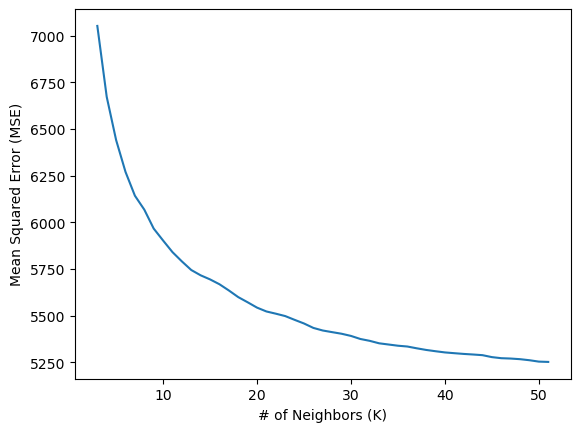

In [118]:
df.reset_index()

from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score

location_df = df[['latitude', 'longitude', 'stars']]

stars = location_df['stars']
location_df = location_df.drop(columns='stars')

scaler = StandardScaler()

location_df = pd.DataFrame(scaler.fit_transform(location_df), columns=location_df.columns)

neigh = NearestNeighbors(n_jobs=-1)
# params = {
#     'n_neighbors': list(range(3, 12))
# }

# grid_search = GridSearchCV(neigh, params, cv=5, n_jobs=-1, scoring='adjusted_mutual_info_score')

# grid_search.fit(location_df[['latitude', 'longitude']], stars)

# print(grid_search.best_params_)
# print(grid_search.best_score_)

min_mse = float('inf')
best_k = 0

k_neighbors_tried = []
mse_calculated = []

for k_neighbors in range(3, 52):
    neigh = NearestNeighbors(n_neighbors=k_neighbors, n_jobs=-1)
    neigh = neigh.fit(location_df[['latitude', 'longitude']])
    distances, indices = neigh.kneighbors(location_df[['latitude', 'longitude']])
    for i in range(len(location_df)):
        location_df.loc[i, 'star_prediction'] = stars.iloc[indices[i]].mean()
    
    # print(location_df['star_prediction'])
    # Calculate the accuracy
    difference = stars - location_df['star_prediction']
    difference = difference ** 2
    mse = difference.sum()

    k_neighbors_tried.append(k_neighbors)
    mse_calculated.append(mse)

plt.xlabel("# of Neighbors (K)")
plt.ylabel("Mean Squared Error (MSE)")
plt.plot(k_neighbors_tried, mse_calculated)
plt.show()

# TODO explain why best k is 15 (based on graph)

neigh = NearestNeighbors(n_neighbors=15, n_jobs=-1)
neigh = neigh.fit(location_df[['latitude', 'longitude']])
distances, indices = neigh.kneighbors(location_df[['latitude', 'longitude']])
for i in range(len(location_df)):
    location_df.loc[i, 'avg_star_rating'] = stars.iloc[indices[i]].mean()

In [119]:
# DATA CLUSTERING FROM AKSHAT

# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=11)

# kmeans.fit(location_df)

# location_df['cluster'] = kmeans.predict(location_df)

# colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'brown', 'black', 'gray', 'cyan']

# plt.scatter(location_df['latitude'], location_df['longitude'], c=location_df['cluster'].apply(lambda x: colors[x]))

In [120]:
df['stack_1'] = location_df['avg_star_rating'].to_numpy()
df.drop(columns=['latitude', 'longitude'], inplace=True)
df.head()

,total_open_hours,RestaurantsTakeOut,RestaurantsDelivery,stars,Alcohol,stack_1
3,23.0,False,False,4.0,False,3.866667
5,53.0,True,True,2.0,True,3.200000
9,100.0,False,False,1.5,False,3.000000
11,36.0,True,True,4.0,False,3.933333
12,34.0,True,False,2.5,True,3.366667


In [121]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0, max_depth=10)
X = df.loc[:, df.columns != 'stars']
y = df.loc[:, 'stars']
regressor.fit(X, y) 
y_pred = regressor.predict(X) 
df['stack_2'] = y_pred
df = df[['RestaurantsTakeOut', 'RestaurantsDelivery', 'Alcohol', 'total_open_hours', 'stack_1', 'stack_2', 'stars']]
# at this point, df is the final dataframe we are using (need to do CV for stack_1 and stack_2 models)

In [122]:
df.head()

,RestaurantsTakeOut,RestaurantsDelivery,Alcohol,total_open_hours,stack_1,stack_2,stars
3,False,False,False,23.0,3.866667,3.826269,4.0
5,True,True,True,53.0,3.200000,3.176190,2.0
9,False,False,False,100.0,3.000000,2.000000,1.5
11,True,True,False,36.0,3.933333,3.948214,4.0
12,True,False,True,34.0,3.366667,3.428571,2.5


In [123]:
labels = df['stars']
features_without_stacks = df.drop(columns=['stack_1', 'stack_2', 'stars'])
features_stack1 = df.drop(columns=['stack_2', 'stars'])
features_stack2 = df.drop(columns=['stack_1', 'stars'])
features_all_stacks = df.drop(columns=['stars'])

In [124]:
features_without_stacks.dtypes

RestaurantsTakeOut        bool
RestaurantsDelivery       bool
Alcohol                   bool
total_open_hours       float64
dtype: object

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

# Convert labels from floats to categorical classes (for classification)
# 1.0, 1.5, ..., 4.5, 5.0 --> 9 bins
num_bins = 9
bin_labels = [f'Category_{i}' for i in range(num_bins)]
labels_categorical = pd.cut(labels, bins=num_bins, labels=bin_labels)

clf_criterion = 'gini'

X_train, X_test, Y_train, Y_test = train_test_split(features_without_stacks, labels_categorical, test_size=0.2, random_state=0)


clf = DecisionTreeClassifier(criterion=clf_criterion, random_state=0)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)


print("Accuracy without stacks:", accuracy_score(Y_test, Y_pred))

# Decision Tree Classifier with stack1

X_train, X_test, Y_train, Y_test = train_test_split(features_stack1, labels_categorical, test_size=0.2, random_state=0)


clf = DecisionTreeClassifier(criterion=clf_criterion, random_state=0)
clf = DecisionTreeClassifier(criterion=clf_criterion, random_state=0)

clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

print("Accuracy with stack1:", accuracy_score(Y_test, Y_pred))

# Decision Tree Classifier with stack2

X_train, X_test, Y_train, Y_test = train_test_split(features_stack2, labels_categorical, test_size=0.2, random_state=0)

clf = DecisionTreeClassifier(criterion=clf_criterion, random_state=0)

clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

print("Accuracy with stack2:", accuracy_score(Y_test, Y_pred))

# Decision Tree Classifier with all stacks

X_train, X_test, Y_train, Y_test = train_test_split(features_all_stacks, labels_categorical, test_size=0.2, random_state=0)

clf = DecisionTreeClassifier(criterion=clf_criterion, random_state=0)

clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

print("Accuracy with all stacks:", accuracy_score(Y_test, Y_pred))

# ------ NOW WITH CROSS VALIDATION ------ #

print()
print("With 5-fold cross validation:")

from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(criterion=clf_criterion, random_state=0)

scores = cross_val_score(clf, features_without_stacks, labels_categorical, cv=5)
print("Accuracy without stacks:", scores.mean())

scores = cross_val_score(clf, features_stack1, labels_categorical, cv=5)
print("Accuracy with stack1:", scores.mean())

scores = cross_val_score(clf, features_stack2, labels_categorical, cv=5)
print("Accuracy with stack2:", scores.mean())

scores = cross_val_score(clf, features_all_stacks, labels_categorical, cv=5)
print("Accuracy with all stacks:", scores.mean())

Accuracy without stacks: 0.2531887755102041
Accuracy with stack1: 0.2697704081632653
Accuracy with stack2: 0.27965561224489793
Accuracy with all stacks: 0.2766262755102041

With 5-fold cross validation:
Accuracy without stacks: 0.2548728567930122
Accuracy with stack1: 0.2675334091737476
Accuracy with stack2: 0.2784072048529187
Accuracy with all stacks: 0.27362398056814813
